In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import array
from keras.preprocessing.text import one_hot
from keras.layers.embeddings import Embedding
from numpy import asarray
from numpy import zeros
import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
df = pd.read_csv(r"/content/drive/MyDrive/MSc Project/Data/dataset4.csv")

In [32]:
df

,text,label
0,Syria attack symptoms consistent with nerve ag...,1
1,Homs governor says U.S. attack caused deaths b...,1
2,Death toll from Aleppo bomb attack at least 11...,1
3,Aleppo bomb blast kills six Syrian state TV We...,1
4,29 Syria Rebels Dead in Fighting for Key Alepp...,1
...,...,...
799,Turkish Bombardment Kills 20 Civilians in Syri...,0
800,Martyrs as Terrorists Shell Aleppos Salah Eddi...,0
801,Chemical Attack Kills Five Syrians in Aleppo S...,1
802,5 Killed as Russian Military Chopper Shot down...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


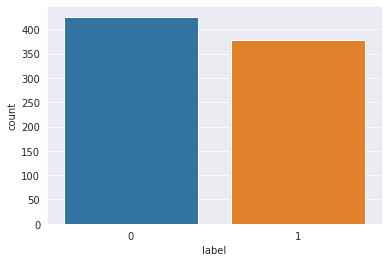

In [33]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(df.label)

In [34]:
X = df['text'].to_list()
y = df['label'].to_list()

**PRE-PROCESSING OF DATA**

REMOVING URLs

In [35]:
import re

In [36]:
# Removing URL's
def remove_url(text):
    return re.sub(r'http\S+', '', text)

In [37]:
X_url = [remove_url(x) for x in X]

LOWERCASING

In [38]:
X_lower = [x.lower() for x in X_url]

In [39]:
X_lower[:5]

['syria attack symptoms consistent with nerve agent use who wed 05 apr 2017 syria attack symptoms consistent with nerve agent use who. victims of a suspected chemical attack in syria appeared to show symptoms consistent with reaction to a nerve agent the world health organization said on wednesday. "some cases appear to show additional signs consistent with exposure to organophosphorus chemicals a category of chemicals that includes nerve agents" who said in a statement putting the death toll at at least 70. the united states has said the deaths were caused by sarin nerve gas dropped by syrian aircraft. russia has said it believes poison gas had leaked from a rebel chemical weapons depot struck by syrian bombs. sarin is an organophosporus compound and a nerve agent. chlorine and mustard gas which are also believed to have been used in the past in syria are not. a russian defence ministry spokesman did not say what agent was used in the attack but said the rebels had used the same chemi

REMOVING ALL NON-ALPHABETS

In [40]:
def cleandata(s):
    replaced = re.sub("[^a-zA-Z' ]+", '', s)
    return replaced

In [41]:
X_re = [cleandata(x) for x in X_lower]

In [42]:
len(X_re[0])

2305

STOPWORD REMOVAL

In [43]:
import nltk
from nltk.corpus import stopwords

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
stop = set(stopwords.words('english'))

In [46]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [47]:
X_stop = [remove_stopwords(x) for x in X_re]

In [48]:
len(X_stop[0])

1727

In [49]:
df = pd.DataFrame(list(zip(X_stop, y)),
               columns =['text', 'label'])

In [50]:
df.to_csv(r'/content/drive/MyDrive/MSc Project/Data/dataset4_preprocessed.csv', index=False)

In [51]:
url_saved = '/content/drive/MyDrive/MSc Project/Data/dataset4_preprocessed.csv'
df_save = pd.read_csv(url_saved)
df_save

,text,label
0,syria attack symptoms consistent nerve agent u...,1
1,homs governor says us attack caused deaths doe...,1
2,death toll aleppo bomb attack least sun apr de...,1
3,aleppo bomb blast kills six syrian state tv we...,1
4,syria rebels dead fighting key aleppo road sun...,1
...,...,...
799,turkish bombardment kills civilians syria turk...,0
800,martyrs terrorists shell aleppos salah eddin m...,0
801,chemical attack kills five syrians aleppo sana...,1
802,killed russian military chopper shot syria kil...,0
